In [142]:
# 基础环境配置，包含pandas，numpy，matplotlib以及常用颜色
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 plt.rcParam
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#百度 Echarts 里面的一组颜色。
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

# 线性回归预测模型

## 一、首先，什么是线性回归与非线性回归？

- 在统计学中，线性回归是利用称为线性回归方程的最小二乘函数对一个或多个自变量和因变量之间关系进行建模的一种回归分析。这种函数是一个或多个称为回归系数的模型参数的线性组合。当因变量和自变量之间高度相关时，我们就可以使用线性回归来对数据进行预测。


- **线性回归模型，是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。**其表达形式为y = w'x+e，e为误差服从均值为0的正态分布。线性回归模型是利用称为线性回归方程的最小平方函数对一个或多个自变量和因变量之间关系进行建模的一种回归分析。这种函数是一个或多个称为回归系数的模型参数的线性组合。只有一个自变量的情况称为简单回归,大于一个自变量情况的叫做多元回归。


- **非线性回归，是在掌握大量观察数据的基础上，利用数理统计方法建立因变量与自变量之间的回归关系函数表达式（称回归方程式）。**回归分析中，当研究的因果关系只涉及因变量和一个自变量时，叫做一元回归分析；当研究的因果关系涉及因变量和两个或两个以上自变量时，叫做多元回归分析。


- 区别
    线性回归与非线性回归通过自变量的指数来区分

## 二、简单线性回归的原理及数学推导

简单线性回归为一元线性回归模型，是指模型中只含有一个自变量和因变量，该模型的数学公式可以表示为y=ax+b+ε，a为模型的斜率，b为模型的截距，ε为误差。



我们可能听过最小二乘法(OLS)这个词，它就是我们理解简单线性回归模型的关键。最小二乘法，其实就是最小化残差的平方和。

对于简单线性回归，函数可以用可以用一个公式来表示，假设x和y之间存在这样的关系：

> $\widehat{y_{i}}=a x_{i}+b$

其中等号左边带的y是我们y的预测值，实际情况时我们预测的数值与实际数值之间的差异，就是残差，即：

> error $=y-\hat{y}$


我们的残差平方和，就是：


> $R S S(S S E)=\sum_{i=1}^{n}\left(y_{i}-\widehat{y_{i}}\right)^{2}=\sum_{i=1}^{n}\left[y_{i}-\left(a x_{i}+b\right)\right]^{2}$


我们的目的是使得预测值尽可能地接近实际值，即残差越小越好。也就是说，当我们找到一组（a, b），使得残差平方和最小时，就说明在某种程度上，我们找到了预测效果最好的简单线性回归模型。

为什么要用残差的平方和，而不是残差呢？因为残差有正有负，他们的和不能代表真正的误差；那为什么不用残差的绝对值呢？其实残差的绝对值是一个很好的指标。但是对机器和数学来说，计算、表示残差的平方和时，远比计算和表示残差的绝对值要来得方便；**同时，由于平方和的数据形态是一个U型的曲线，方便我们通过求导、随机梯度下降等方式得到最小值。**

重点：求导（最小二乘法）、梯度下降两种方式，

那么接下来我们就来求解我们的系数(a, b)，如前边所言，残差平方和的数据形态是一个U型曲线，因此当且仅当导数为0时，我们得到最低点，重点是导数为0时，此时为残差平方和曲线的最低点，即此时的残差最小，结果最接近实际值。

接下来就是运用导数的知识求解这个数学公式。

**求解过程：求导--->导数结果为0时为正确结果--->求出a、b的计算公式**

1. 求解b

J(a, b)代表损失函数，在这个例子中，就是我们上边提到的残差平方和。先对b求导，并使导数等于0：


> $J(a, b)=\sum_{i=1}^{n}\left[y_{i}-\left(a x_{i}+b\right)\right]^{2}$

> $=>\frac{\partial J(a, b)}{\partial b}=\sum_{i=1}^{n} 2\left[y_{i}-\left(a x_{i}+b\right)\right](-1)=0$

> $=>\sum_{i=1}^{n}\left(y_{i}-a x_{i}-b\right)=0$

> $=>\sum_{i=1}^{n} y_{i}-a \sum_{i=1}^{n} x_{i}-\sum_{i=1}^{n} b=0$

> $=>b=\frac{1}{n} \sum_{i=1}^{n} y_{i}-\frac{1}{n} a \sum_{i=1}^{n} x_{i}$

> $=>b=\overline{y}-a \overline{x}$

2. 求解a

> $\begin{aligned} \frac{\partial J(a, b)}{\partial a} &=\sum_{i=1}^{n} 2\left[y_{i}-\left(a x_{i}+b\right)\right]\left(-x_{i}\right)=0 \\ &=>\sum_{i=1}^{n}\left(y_{i} x_{i}-a x_{i}^{2}-b x_{i}\right)=0 \\ b=\overline{y}-a \overline{x} \quad &=>\sum_{i=1}^{n}\left(y_{i} x_{i}-a x_{i}^{2}-\overline{y} x_{i}+a \overline{x} x_{i}\right)=0 \\ &=>\sum_{i=1}^{n}\left(y_{i} x_{i}-\overline{y} x_{i}\right)-a \sum_{i=1}^{n}\left(x_{i}^{2}-\overline{x} x_{i}\right)=0 \\ &=>a=\frac{\sum_{i=1}^{n}\left(y_{i} x_{i}-\overline{y} x_{i}\right)}{\sum_{i=1}^{n}\left(x_{i}^{2}-\overline{x} x_{i}\right)} \end{aligned}$

> $\begin{aligned} \boldsymbol{又} & \sum_{i=1}^{n} x_{i} \overline{y}=n \overline{x y}, \quad \sum_{i=1}^{n} x_{i} \overline{x}=n \overline{x}^{2} \\=>a &=\frac{\sum_{i=1}^{n}\left(y_{i} x_{i}-\overline{y} x_{i}-\overline{x} y_{i}+\overline{x y}\right)}{\sum_{i=1}^{n}\left(x_{i}^{2}-\overline{x} x_{i}-\overline{x} x_{i}+\overline{x}^{2}\right)} \\ &=\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}} \end{aligned}$

最后的结果
现在我们成功地推导出了(a, b)的求解公式，即：


> $a=\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}$

> $b=\overline{y}-a \overline{x}$

以上求解过程中运用的是导数计算的相关公式，计算过程为先对a求导，再对b求导，再代入a、b计算最终结果，即a、b的值与x、y的关系式，此时再将x、y值代入即可求解a、b的值。
还有一种计算思路是先将J(a,b)进行展开，再分别对a、b求导计算，当然，最终的结果都是一样的。
如不清楚，可复习下高数相关课程。

在求出a、b的值之后，接下来，根据该公式，利用python计算出回归模型的参数值a和b。

## 三、利用python计算出回归模型的参数值a、b

In [116]:
# 导入数据源,这里是用来做测试的数据源，找出工作年限和薪水的关系，并预测值，
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
income = pd.read_csv('E:\文档\桌面\Python-Data-Aanalysis-and-Miner-master\第7章 线性回归模型\Salary_Data.csv')
income  # 显示所有数据

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


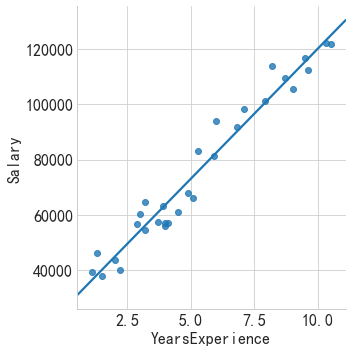

In [146]:
#绘制散点图,
#lmplot 是一种集合基础绘图与基于数据建立回归模型的绘图方法。旨在创建
#一个方便拟合数据集回归模型的绘图方法，利用'hue'、'col'、'row'参数来控制绘图变量。

sns.lmplot(x='YearsExperience',y='Salary',data=income,ci=None)

### 第一种方法，使用python计算

> $a=\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}$


> $b=\overline{y}-a \overline{x}$

In [200]:
#n为总数
n=income.shape[0]
# 计算自变量、因变量、自变量平方、自变量与因变量乘积的和
# sum_x = income.YearsExperience.sum()
# sum_y = income.Salary.sum()
# sum_x2 = income.YearsExperience.pow(2).sum()
# xy = income.YearsExperience * income.Salary
# sum_xy = xy.sum()

#代入公式计算a，b结果
s = 0
x = 0
for i in income.index:
    s = s + (income.YearsExperience[i]-income.YearsExperience.mean()) * (income.Salary[i]-income.Salary.mean()) 
    x = x + pow((income.YearsExperience[i]-income.YearsExperience.mean()),2)

a = s / x     
b = income.Salary.mean() - a * (income.YearsExperience.mean())
a,b

(9449.962321455077, 25792.20019866869)

### 第二种方法，使用python的statsmodels模块构建

statsmodel所示专门用于统计建模的第三方模块，如需实现线性回归模型的参数求解，可以调用子模块中的ols函数

该函数语法：

`ols(formula,data,subset=None,drop_cols=None)`

- fromula:以字符串形式指定线性回归的模型，y~x就表示简单线性回归模型
- data:指定建模的数据集
- subset:通过布尔类型的数组对象，获取data的子集用于建模
- drop_cols:指定需要从data中删除的变量

In [117]:
import statsmodels.api as sm

#构建回归模型
fit = sm.formula.ols('Salary ~ YearsExperience',data = income).fit()
fit.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### 第三种方法，使用机器学习模块进行构建

这里使用机器学习的sklearn模块，sklearn是一个Python第三方提供的非常强力的机器学习库，它包含了从数据预处理到训练模型的各个方面。在实战使用scikit-learn中可以极大的节省我们编写代码的时间以及减少我们的代码量，使我们有更多的精力去分析数据分布，调整模型和修改超参。

sklearn拥有可以用于监督和无监督学习的方法，一般来说监督学习使用的更多。sklearn中的大部分函数可以归为估计器(Estimator)和转化器(Transformer)两类。

- 估计器(Estimator)其实就是模型，它用于对数据的预测或回归。基本上估计器都会有以下几个方法：

fit(x,y):传入数据以及标签即可训练模型，训练的时间和参数设置，数据集大小以及数据本身的特点有关

score(x,y)用于对模型的正确率进行评分(范围0-1)。但由于对在不同的问题下，评判模型优劣的的标准不限于简单的正确率，可能还包括召回率或者是查准率等其他的指标，特别是对于类别失衡的样本，准确率并不能很好的评估模型的优劣，因此在对模型进行评估时，不要轻易的被score的得分蒙蔽。

predict(x)用于对数据的预测，它接受输入，并输出预测标签，输出的格式为numpy数组。我们通常使用这个方法返回测试的结果，再将这个结果用于评估模型。

- 转化器(Transformer)用于对数据的处理，例如标准化、降维以及特征选择等等。同与估计器的使用方法类似:

fit(x,y):该方法接受输入和标签，计算出数据变换的方式。

transform(x):根据已经计算出的变换方式，返回对输入数据x变换后的结果（不改变x）

fit_transform(x,y) :该方法在计算出数据变换方式之后对输入x就地转换。

以上仅仅是简单的概括sklearn的函数的一些特点。sklearn绝大部分的函数的基本用法大概如此。但是不同的估计器会有自己不同的属性，例如随机森林会有Feature_importance来对衡量特征的重要性，而逻辑回归有coef_存放回归系数intercept_则存放截距等等。并且对于机器学习来说模型的好坏不仅取决于你选择的是哪种模型，很大程度上与你超参的设置有关。因此使用sklearn的时候一定要去看看官方文档，以便对超参进行调整。

在sklearn中集成了多种常用的机器学习方法，比如SVM、随机森林、GBDT、决策树、K近邻、K均值、神经网络和LR等等。把学习算法封装成统一的模板，用fit函数来训练，用predict函数来预测。 

### sklearn第一次测试

***由于是第一次使用sklearn这个包，所以先进行一次测试***

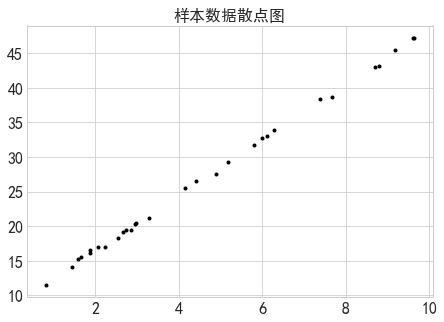

计算出来的值，a=4.002743,,,,b=8.495176
拟合函数为，y = 4.002743 * x  + 8.495176
与原散点数值样本关系y = 4x + 8 近似


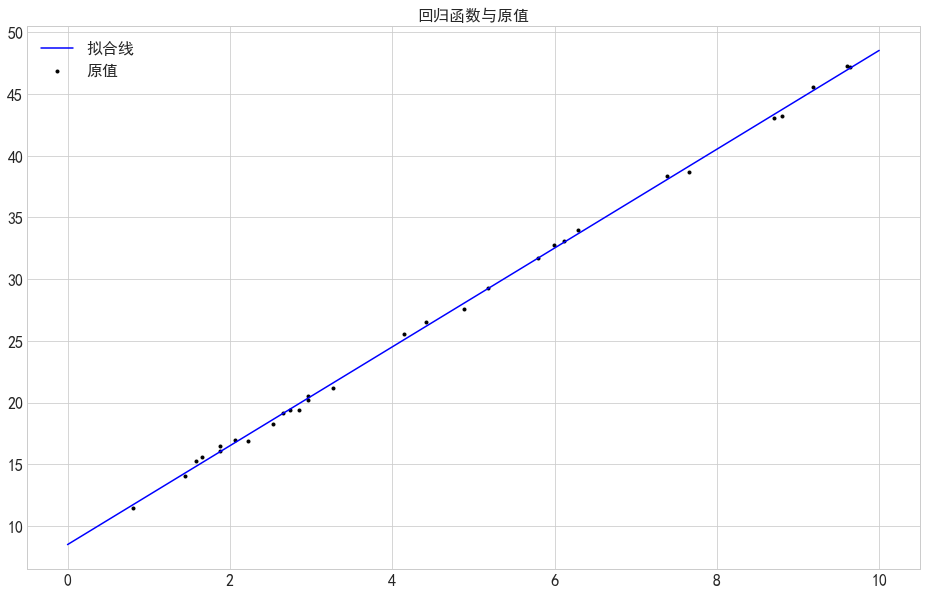

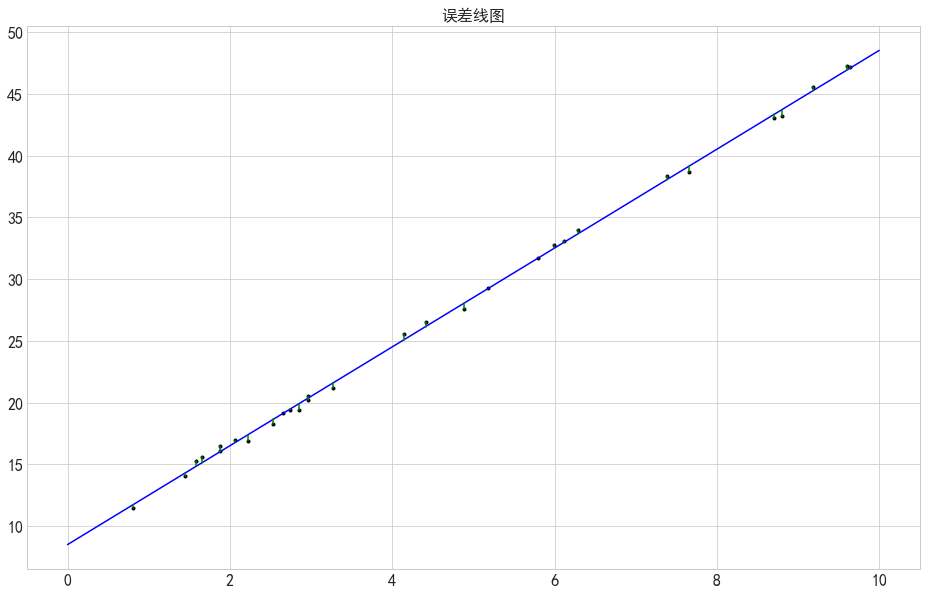

In [221]:
# 导入线性回归模块
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(5) #选定随机数种子，这样生成的随机数不会改变
xtrain = 10 * rng.rand(30)
ytrain = 8+4*xtrain + rng.rand(30)  #样本关系近似y=8+4x
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
plt.scatter(xtrain,ytrain,marker='.',color='k')
plt.title('样本数据散点图')
plt.show()


model = LinearRegression() #创建线性回归模型
model.fit(xtrain.reshape(-1, 1),ytrain) #放入参数,需要将xtrain转换为列维度，因为是矩阵运算

#查看结果
model.coef_  #查看斜率，即y=ax+b中的a
model.intercept_ #查看截距，即y=ax+b中的b
print('计算出来的值，a=%f,,,,b=%f'%(model.coef_,model.intercept_))
print('拟合函数为，y = %f * x  + %f'%(model.coef_,model.intercept_))
print('与原散点数值样本关系y = 4x + 8 近似')

#进行测试
xtest = np.linspace(0,10,100) #返回一个等差数列
ytest = model.predict(xtest.reshape(-1,1))  #使用predict进行预测

#新建一个预测值的图表
ax2 = fig.add_subplot(122)
#fig = plt.figure(figsize=(8,5))
plt.scatter(xtrain,ytrain,marker='.',color='k',label='原值')
plt.plot(xtest,ytest,color='b',label='拟合线')
plt.title('回归函数与原值')
plt.legend()
plt.show()


# sklearn的误差值
plt.scatter(xtrain,ytrain,marker='.',color='k',label='原值')

ytest2 = model.predict(xtrain.reshape(-1,1)) #样本数据在拟合线上的y值
plt.plot(xtest,ytest,color='b',label='拟合线')
#plt.scatter(xtrain,ytest2,marker='x',color='k',label='原值')
plt.plot([xtrain,xtrain],[ytrain,ytest2],color='g')  #误差线
plt.title('误差线图')
plt.show() 

### 测试成功，所以，我们这里使用机器学习的方法进行一次简单线性回归模型拟合

In [226]:
# 导入线性回归模块
from sklearn.linear_model import LinearRegression
model0 = LinearRegression() #创建线性回归模型
xtrain0 = income.YearsExperience  
ytrain0 = income.Salary
model0.fit(np.array(xtrain0).reshape(-1,1),np.array(ytrain0)) #进行拟合，将dataframe转换为ndarray形式,将xtrain转换为列维度
model0.coef_  #查看斜率，即y=ax+b中的a
model0.intercept_ #查看截距，即y=ax+b中的b
print('计算出来的值，a=%f,,,,b=%f'%(model0.coef_,model0.intercept_))
print('拟合函数为，y = %f * x  + %f'%(model0.coef_,model0.intercept_))

计算出来的值，a=9449.962321,,,,b=25792.200199
拟合函数为，y = 9449.962321 * x  + 25792.200199


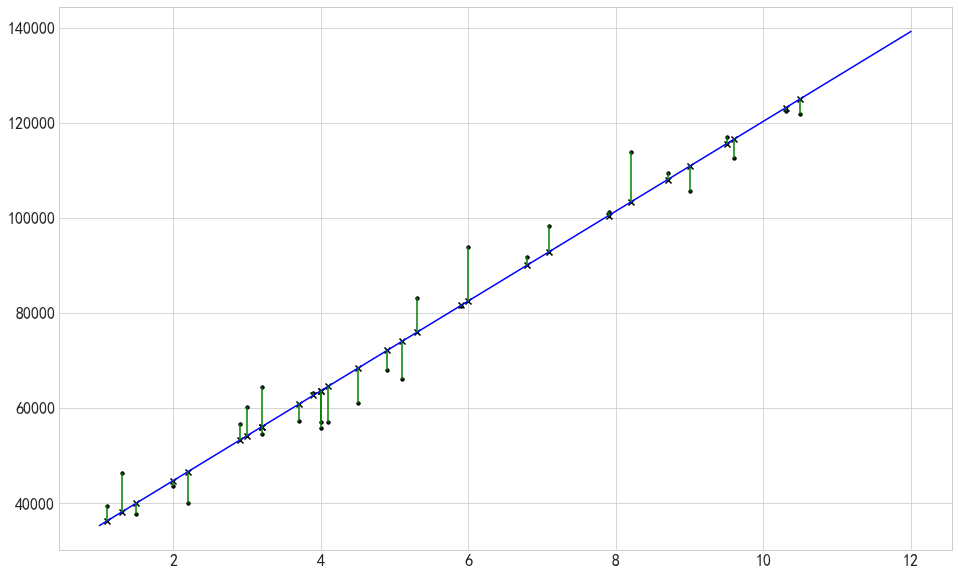

In [262]:
# 将相关结果进行绘图显示出来
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(xtrain0,ytrain0,marker='.',color='k',label='实际值')
xtest0 = np.linspace(1,12,100)
ytest0 = model.predict(np.array(xtest0).reshape(-1,1)) #给定数据预测值
ytest111 = model.predict(np.array(xtrain0).reshape(-1,1)) #样本数据在拟合线上的y值
plt.plot(xtest0,ytest0,color='b',label='拟合线')
plt.scatter(xtrain0,ytrain0,marker='.',color='k',label='原值')
plt.scatter(xtrain0,ytest111,marker='x',color='k',label='原值拟合值')
plt.plot([xtrain0,xtrain0],[ytrain0,ytest111],color='g')  #误差线
#plt.title('误差线图')
plt.show() 

### 最终结果

以上三种方法计算出来的最终结果如下

- statsmodels与机器学习拟合的结果一致为

**Salary = 25792.200199 + 9449.962321 * YearsExperience**

- 使用python计算拟合的结果为：

**Salary = 25792.20019866869 + 9449.962321455077 * YearsExperience**

可以发现，使用python计算拟合的结果的小数位更加多，理论上应该更加精确，因为没有舍弃后续的小数。

### 线性回归模型评估

这里需要对该模型的进行检验评价，有以下几种方式

**1. SSE(误差平方和)：即求解实际值与在拟合线上的预测值的误差的平方和**


$S S E=\sum_{i=1}^{n} \left(y_{i}-\hat{y}_{i}\right)^{2}$

SSE越接近于0说明拟合的效果越好。

**2. MSE(均方差、方差)：**

预测数据和原始数据对应点误差的平方和的均值，=SSE/n，

$M S E=S S E / n=\frac{1}{n} \sum_{i=1}^{n} \left(y_{i}-\hat{y}_{i}\right)^{2}$


**3. RMSE(均方根、标准差)：**

该统计参数，也叫回归系统的拟合标准差，是MSE的平方根，公式如下：

$R M S E=\sqrt{M S E}=\sqrt{\operatorname{SSE} / n}=\sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(y_{i}-\hat{y}_{i}\right)^{2}}$


**4. R-squre(确定系数)**

上面的几种衡量标准针对不同的模型会有不同的值，数字之间没有可比性，没有什么可读性，这里就有一种新的评价方法那就是R Squared

计算逻辑为：

（1）SSR:Sum of squares of the regression，即预测数据与原始数据均值之差的平方和


$S S R=\sum_{i=1}^{n} \left(\hat{y}_{i}-\overline{y}_{i}\right)^{2}$

（2）SST:Total sum of squares，即原始数据和均值之差的平方和(即为这组数据的方差)

$S S T=\sum_{i=1}^{n} \left(y_{i}-\overline{y}_{i}\right)^{2}$

有个前提公式：***SST = SSE + SSR***

（3）最终的公式为

$R-$square$=\frac{S S R}{S S T}=\frac{S S T-S S E}{S S T}=1-\frac{S S E}{S S T}$


R-square“确定系数”是定义为SSR和SST的比值，值越接近1，表明方程的变量对y的解释能力越强，这个模型对数据拟合的也较好

### 使用R-square进行线性回归模型评估

有两种方法，一种是使用python进行计算，一种是导入机器学习的模块进行计算，在机器学习的模块中，又分为两种方法，一种是按过程计算，一种就是直接调用相关模块进行计算。

In [249]:
#机器学习按过程计算
from sklearn import metrics
# 导入线性回归模块
from sklearn.linear_model import LinearRegression
model0 = LinearRegression() #创建线性回归模型
xtrain0 = income.YearsExperience  
ytrain0 = income.Salary
model0.fit(np.array(xtrain0).reshape(-1,1),np.array(ytrain0)) #进行拟合，将dataframe转换为ndarray形式,将xtrain转换为列维度
model0.coef_  #查看斜率，即y=ax+b中的a
model0.intercept_ #查看截距，即y=ax+b中的b
ytest0 = model0.predict(np.array(xtrain0).reshape(-1,1))
MSE = metrics.mean_absolute_error(ytrain0,ytest0)
print('MSE',MSE)
SSR = ((ytest0-ytrain0.mean())**2).sum() #**2代表平方
SST = ((ytrain0-ytrain0.mean())**2).sum()

R2 = SSR/SST
print('R2',R2)

#机器学习直接调用相关模块计算
R22 = model0.score(np.array(xtrain0).reshape(-1,1),np.array(ytrain0))
print('R22',R22)

MSE 4644.2012894435375
R2 0.9569566641435078
R22 0.9569566641435084


可以看到实际的计算结果是一致的，为0.96，还是挺高的一个分数的。

## 五、相关数学知识

### 导数相关概念

导数：导数的本质是通过极限的概念对函数进行局部的线性逼近。例如在运动学中，物体的位移对于时间的导数就是物体的瞬时速度。

1、一阶导数的几何意义是求原来曲线在任意一点的切线的斜率,得出来的是一个函数,叫做导函数,简称导数.它是一个计算任何点的斜率的通式.
2、令一阶导数为0,就是找到有水平切线的点.

3、一阶导数等于0只是有极值的必要条件,不是充分条件,也就是说：
有极值的地方,其切线的斜率一定为0；
切线斜率为0的地方,不一定是极值点.
例如,y = 3, 处处导数为0,可是它并无极值点.
所以,在一阶导数等于0的地方,还必须计算二阶导数,才能作出充分的判断.


4、二阶导数导数大于0的几何意义是：曲线向上开口(Concave up);
二阶导数导数小于0的几何意义是：曲线向下开口(Concave down).
如果二阶导数也为0,就不是极值点,而是拐点(POI = Point of Inflection),
也就是向上开口与向下开口的转折点(这个转折点不用Turning Point表达,
因为turning point一词已经被使用于极值点,所以另取一名POI,以免混淆).
原问题改为：“为什么要令一阶导数为0才能求极值?”,这样会更确切一些.
因为求极值时,“当且仅当”一阶导数为0,才有可能是极值点；
在计算极值时,“令且仅令”一阶导数为0,才能计算出极值点
    

## 六、最后

参考文章：
[从零掌握简单线性回归](https://www.toutiao.com/i6635931795382600200/)


参考书籍:
> 从零开始学Python数据分析与挖掘-刘顺祥


参考视频：
> 网易云课堂相关视频

接下来会做多元线性回归模型及一元非线性回归模型的推导过程及实际应用，尽请关注。